# Exploratory Data Analysis Process

## Reading the data and seting imports


In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df = pd.read_csv('../data/raw/full_data_2020_2025_FORD.csv')

## Data anlaysis

In [2]:
# Checking the data 
df.head(2)

,Year,Make,Model,odiNumber,manufacturer,crash,fire,numberOfInjuries,numberOfDeaths,dateOfIncident,dateComplaintFiled,vin,components,summary,products
0,2020,FORD,RANGER,11642687,Ford Motor Company,False,False,0,0,07/14/2023,02/14/2025,1FTER4FH4LL,"ELECTRICAL SYSTEM,FORWARD COLLISION AVOIDANCE",The contact owns a 2020 Ford Ranger. The conta...,"[{'type': 'Vehicle', 'productYear': '2020', 'p..."
1,2020,FORD,RANGER,11635073,Ford Motor Company,False,False,0,0,01/09/2025,01/09/2025,1FTER4FH0L,VISIBILITY,The contact owns a 2020 Ford Ranger. The conta...,"[{'type': 'Vehicle', 'productYear': '2020', 'p..."


In [3]:
# Printing the data in a way to see all the informations
print(df.head().to_string())


   Year  Make   Model  odiNumber        manufacturer  crash   fire  numberOfInjuries  numberOfDeaths dateOfIncident dateComplaintFiled          vin                                     components                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [4]:
# Printing the data types of each column
df.dtypes

Year                   int64
Make                  object
Model                 object
odiNumber              int64
manufacturer          object
crash                   bool
fire                    bool
numberOfInjuries       int64
numberOfDeaths         int64
dateOfIncident        object
dateComplaintFiled    object
vin                   object
components            object
summary               object
products              object
dtype: object

In [5]:
# Generating summary numerical columns 
df.describe()

,Year,odiNumber,numberOfInjuries,numberOfDeaths
count,41971.000000,4.197100e+04,41971.000000,41971.000000
mean,2021.166806,1.154163e+07,0.030521,0.000429
std,1.029389,6.919120e+04,0.214991,0.022891
min,2020.000000,1.127095e+07,0.000000,0.000000
25%,2020.000000,1.149769e+07,0.000000,0.000000
50%,2021.000000,1.154794e+07,0.000000,0.000000
75%,2022.000000,1.159546e+07,0.000000,0.000000
max,2025.000000,1.164860e+07,5.000000,2.000000


In [6]:
# Checking null values in each column
df.isnull().sum()

Year                    0
Make                    0
Model                   0
odiNumber               0
manufacturer            0
crash                   0
fire                    0
numberOfInjuries        0
numberOfDeaths          0
dateOfIncident          0
dateComplaintFiled      0
vin                   507
components              0
summary                 0
products                0
dtype: int64

In [7]:
# Counting the number of unique values 
category_counts = df.nunique()
print(category_counts)

Year                      6
Make                      1
Model                    87
odiNumber             10418
manufacturer              4
crash                     2
fire                      2
numberOfInjuries          6
numberOfDeaths            3
dateOfIncident         1714
dateComplaintFiled     1632
vin                    3493
components              573
summary               10228
products                201
dtype: int64


In [8]:
# Exploring the distribution of data to identify patterns or inconsistencies.


columns_to_analyze = [col for col in df.columns if col not in ['odiNumber', 'dateOfIncident','dateComplaintFiled','vin','summary']]
for col in columns_to_analyze:
    print(f"Feature: {col}")
    print(df[col].value_counts())
    print("\n")

Feature: Year
Year
2021    14081
2020    13078
2022    10478
2023     3443
2024      849
2025       42
Name: count, dtype: int64


Feature: Make
Make
FORD    41971
Name: count, dtype: int64


Feature: Model
Model
ESCAPE                                 3990
F-150 SUPER CREW                       3342
F-150 SUPER CREW DIESEL                3342
F-150 SUPER CREW HEV                   2486
F-150 SUPER CAB DIESEL                 2486
EXPLORER                               2472
F-150 REGULAR CAB                      2274
MAVERICK                               1580
F-150 SUPER CAB                        1418
F-150  REGULAR CAB                     1068
F-150  SUPER CAB                       1068
EXPEDITION                              954
BRONCO                                  912
ECOSPORT                                870
F-150 SUPERCAB DIESEL                   856
F-150 SUPERCAB                          856
MUSTANG MACH-E                          744
BRONCO SPORT                           

In [9]:
# Analyzing the distribution of data in the 'components
df['components'].value_counts()

components
POWER TRAIN                                                                   6992
UNKNOWN OR OTHER                                                              3134
ELECTRICAL SYSTEM                                                             3063
STRUCTURE                                                                     2385
ENGINE                                                                        2249
VISIBILITY                                                                    1764
VISIBILITY/WIPER                                                              1441
SERVICE BRAKES                                                                1310
EXTERIOR LIGHTING                                                              970
ENGINE AND ENGINE COOLING                                                      657
BACK OVER PREVENTION                                                           633
ELECTRICAL SYSTEM,EQUIPMENT                                                 

In [10]:
# Analyzing the distribution of data in the 'Model
df['Model'].value_counts()

Model
ESCAPE                                 3990
F-150 SUPER CREW                       3342
F-150 SUPER CREW DIESEL                3342
F-150 SUPER CREW HEV                   2486
F-150 SUPER CAB DIESEL                 2486
EXPLORER                               2472
F-150 REGULAR CAB                      2274
MAVERICK                               1580
F-150 SUPER CAB                        1418
F-150  REGULAR CAB                     1068
F-150  SUPER CAB                       1068
EXPEDITION                              954
BRONCO                                  912
ECOSPORT                                870
F-150 SUPERCAB DIESEL                   856
F-150 SUPERCAB                          856
MUSTANG MACH-E                          744
BRONCO SPORT                            702
F-250 REGULAR CAB                       646
F-250 CREW CAB                          646
F-150 (SUPER CREW) GAS                  638
F-150 (SUPER CAB) GAS                   638
F-150 (REGULAR CAB) GAS   

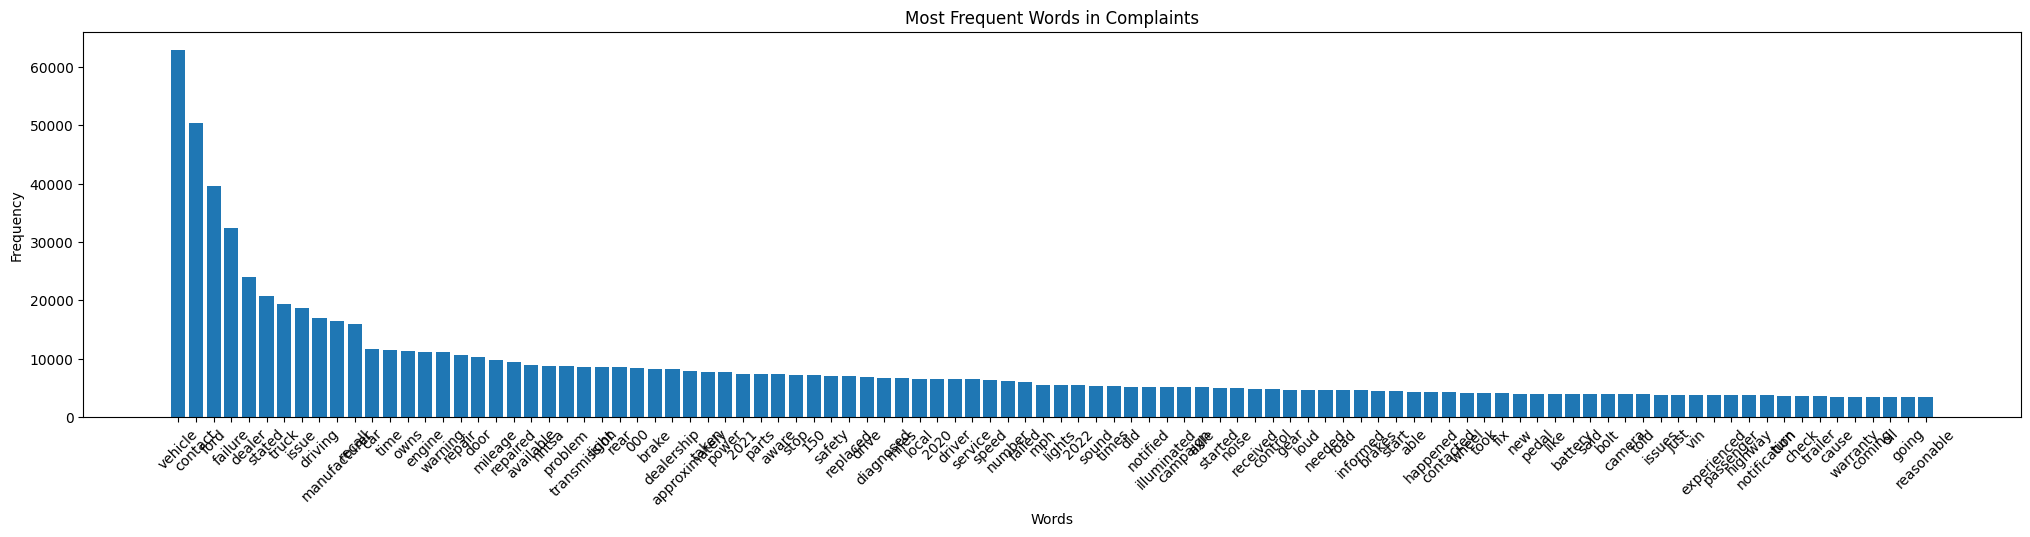

Most Frequent Words in Complaints:
vehicle: 62906
contact: 50489
ford: 39628
failure: 32450
dealer: 23984
stated: 20783
truck: 19317
issue: 18662
driving: 17044
manufacturer: 16516
recall: 15996
car: 11593
time: 11428
owns: 11271
engine: 11134
repair: 10688
door: 10234
mileage: 9685
repaired: 9331
available: 8954
nhtsa: 8650
problem: 8650
transmission: 8505
light: 8489
rear: 8482
000: 8304
brake: 8203
dealership: 8167
approximately: 7787
taken: 7710
power: 7644
2021: 7426
parts: 7341
aware: 7303
stop: 7134
150: 7105
safety: 6994
replaced: 6927
drive: 6880
diagnosed: 6736
miles: 6666
local: 6535
2020: 6514
driver: 6472
service: 6441
speed: 6284
number: 6211
failed: 5899
mph: 5445
lights: 5419
2022: 5400
sound: 5326
times: 5233
did: 5182
notified: 5170
illuminated: 5096
campaign: 5084
axle: 5076
started: 4941
noise: 4896
received: 4786
control: 4784
gear: 4684
loud: 4625
needed: 4602
road: 4572
informed: 4532
brakes: 4350
start: 4349
able: 4318
happened: 4260
contacted: 4213
wheel: 4118


In [12]:
texts = df['summary'].dropna()  

# Analyzing the most frequent words using CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=100)  # Remove common stopwords and limit to top 50 words
word_counts = vectorizer.fit_transform(texts)  # Transform the text into a matrix of word counts

# Get the most frequent words
words_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).A1))
sorted_words_freq = sorted(words_freq.items(), key=lambda x: x[1], reverse=True)  # Sort words by frequency

# Visualize the most frequent words with a bar chart
plt.figure(figsize=(25, 5))  
plt.bar(*zip(*sorted_words_freq))  
plt.xticks(rotation=45)  
plt.title('Most Frequent Words in Complaints')  
plt.xlabel('Words')  
plt.ylabel('Frequency')  
plt.show()  

# Display the most frequent words in the console
print("Most Frequent Words in Complaints:")
for word, freq in sorted_words_freq:
    print(f"{word}: {freq}")


In [13]:
# Number of complaints for each model
complaints_by_model = df.groupby('Model').size().reset_index(name='num_complaints')
print(complaints_by_model.sort_values(by='num_complaints', ascending=False))


                                  Model  num_complaints
9                                ESCAPE            3990
26              F-150 SUPER CREW DIESEL            3342
25                     F-150 SUPER CREW            3342
27                 F-150 SUPER CREW HEV            2486
24               F-150 SUPER CAB DIESEL            2486
14                             EXPLORER            2472
22                    F-150 REGULAR CAB            2274
56                             MAVERICK            1580
23                      F-150 SUPER CAB            1418
16                   F-150  REGULAR CAB            1068
17                     F-150  SUPER CAB            1068
12                           EXPEDITION             954
0                                BRONCO             912
7                              ECOSPORT             870
29                F-150 SUPERCAB DIESEL             856
28                       F-150 SUPERCAB             856
67                       MUSTANG MACH-E         

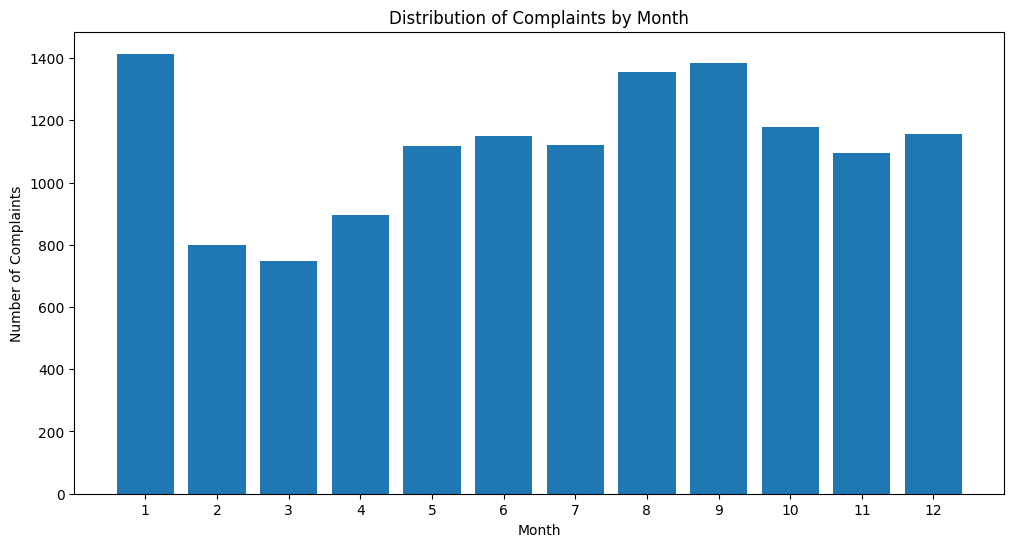

In [48]:
# Check the distribution of complaints by month
df['month_complaint'] = pd.to_datetime(df['dateComplaintFiled']).dt.month  
complaints_by_month = df.groupby('month_complaint').size().reset_index(name='num_complaints') 

# Visualize the number of complaints by month using a bar chart
plt.figure(figsize=(12, 6)) 
plt.bar(complaints_by_month['month_complaint'], complaints_by_month['num_complaints'])
plt.xticks(complaints_by_month['month_complaint'])  
plt.title('Distribution of Complaints by Month')  
plt.xlabel('Month')  
plt.ylabel('Number of Complaints')  
plt.show()  


In [15]:
# Análise de componentes mais frequentemente mencionados
df['components_list'] = df['components'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
df_exploded = df.explode('components_list')
components_count = df_exploded['components_list'].value_counts().reset_index(name='count')
components_count.columns = ['Component', 'Count']
print(components_count)

                                 Component  Count
0                              POWER TRAIN  10659
1                        ELECTRICAL SYSTEM   7962
2                         UNKNOWN OR OTHER   5780
3                                   ENGINE   5043
4                                STRUCTURE   3453
5                           SERVICE BRAKES   3210
6                               VISIBILITY   2204
7              FORWARD COLLISION AVOIDANCE   2101
8                         VISIBILITY/WIPER   1918
9                        EXTERIOR LIGHTING   1452
10                    BACK OVER PREVENTION   1441
11                   VEHICLE SPEED CONTROL   1412
12                                STEERING   1410
13                  FUEL/PROPULSION SYSTEM   1318
14                               EQUIPMENT   1240
15                              SUSPENSION   1101
16                                  WHEELS   1088
17               ENGINE AND ENGINE COOLING    853
18                          LANE DEPARTURE    673
